**Instalando a versão correta do SCIKIT-LEARN**

In [ ]:
!pip install scikit-learn==1.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


**Instalando a biblioteca feature-engine**

In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 5.9 MB/s eta 0:00:00


**Importando bibliotecas**

In [ ]:
import pandas as pd

**Carregando a base da "OLIST" propensao_revenda_abt.csv**

In [ ]:
df_abt = pd.read_csv('/content/drive/MyDrive/02 - Colab Notebooks - Data Science/Python/MBA Fia Labdata - Data Science e Inteligência Artificial/01. Inteligência Artificial I - Prof Hélio Neto/3 -  Manipulação de base de modelagem/Manipulação de base de modelagem _ Banco de Dados/olist/propensao_revenda_abt.csv')
df_abt.shape

(5369, 9)

**Mapeamento das colunas (boa prática, sempre fazer)**

In [ ]:
df_abt.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [ ]:
key_vars = ["data_ref_safra",	"seller_id"]
num_vars = ["tot_orders_12m",	"tot_items_12m",	"tot_items_dist_12m",	"receita_12m",	"recencia"]
cat_vars = ["uf"]
features = num_vars + cat_vars
target = ["nao_revendeu_next_6m"]

In [ ]:
df_abt["data_ref_safra"].value_counts()

,count
data_ref_safra,
2018-03-01,1874
2018-02-01,1805
2018-01-01,1690


**Separando o período**

In [ ]:
df_train = df_abt.query("data_ref_safra < '2018-03-01'")
df_oot = df_abt.query("data_ref_safra == '2018-03-01'")

**Separando que é treino e quem é OOT**

In [ ]:
X_train = df_train[features]
y_train = df_train[target]
X_oot = df_oot[features]
y_oot = df_oot[target]

**Criando os pipelines**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder

Trazendo os modelos e montando os pipelines

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### Criando a pipeline de LogisticRegression
lr_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("numeric_scaler",SklearnTransformerWrapper(variables=num_vars,transformer=StandardScaler())),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("lr",LogisticRegression(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Reduzir a escala de dimensão ("numeric_scaler" - Importante para os algorítimos do tipo lineares)
### Obs: Por fim, chama o algoritmo ("lr")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### Criando a pipeline de Árvore de decisão
dt_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("dt",DecisionTreeClassifier(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Por fim, chama o algoritmo ("dr")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
### Criando a pipeline de RandomForest
rf_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("rf",RandomForestClassifier(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Por fim, chama o algoritmo ("rf")

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
### Criando a pipeline de xgboost
xg_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("xg",XGBClassifier(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Por fim, chama o algoritmo ("xg")

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
### Criando a pipeline de lightgbm
lg_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("lg",LGBMClassifier(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Por fim, chama o algoritmo ("lg")

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
### Criando a pipeline de lightgbm
cat_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("cat",CatBoostClassifier(random_state=42))
    ])

### Obs: Primeiro eu tenho que tratar valores faltantes ("numeric_imputer")
### Obs: Após, trata-se os números faltantes ("cat_imputer")
### Obs: Por fim, chama o algoritmo ("cat")

**FAZENDO A VERIFICAÇÃO CRUZADA (EXTRESSANDO O MODELO) PARA SABER QUAL É O MODELO QUE TEM A MELHOR ADERÊNCIA**

Fazer isso para todos os modelos criados

1) Logistic Regression

2) Decision Tree

3) Random Forest

4) xgboost

5) lightgbm

6) catboost


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**LogisticRegression**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_lr = cross_validate(lr_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_lr = pd.DataFrame(cv_lr) ### Cria um data frame para o treinamento
cv_lr.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,0.161767
score_time,0.272247
test_accuracy,0.825179
test_precision,0.850291
test_recall,0.656920
test_f1,0.741007
test_roc_auc,0.898345


**Decision Tree**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_dt = cross_validate(dt_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_dt = pd.DataFrame(cv_dt) ### Cria um data frame para o treinamento
cv_dt.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,0.142595
score_time,0.219644
test_accuracy,0.776252
test_precision,0.703995
test_recall,0.713213
test_f1,0.708302
test_roc_auc,0.764132


**Random Forest**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_rf = cross_validate(rf_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_rf = pd.DataFrame(cv_rf) ### Cria um data frame para o treinamento
cv_rf.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,1.898560
score_time,0.577940
test_accuracy,0.836624
test_precision,0.798771
test_recall,0.763530
test_f1,0.780582
test_roc_auc,0.912172


**xgboost**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_xg = cross_validate(xg_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_xg = pd.DataFrame(cv_xg) ### Cria um data frame para o treinamento
cv_xg.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,1.014457
score_time,0.590054
test_accuracy,0.837768
test_precision,0.789331
test_recall,0.783791
test_f1,0.786311
test_roc_auc,0.907264


**lightgbm**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_lg = cross_validate(lg_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_lg = pd.DataFrame(cv_lg) ### Cria um data frame para o treinamento
cv_lg.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,0.392788
score_time,0.291350
test_accuracy,0.835479
test_precision,0.791366
test_recall,0.772535
test_f1,0.781464
test_roc_auc,0.907614


**catboost**

In [ ]:
### Treinando, testando, colhendo a métrica (faz isso por 5 vezes)
cv_cat = cross_validate(cat_pipe, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=skf, n_jobs=-1)

cv_cat = pd.DataFrame(cv_cat) ### Cria um data frame para o treinamento
cv_cat.mean() ### Faz a média dos 5 treinamentos

,0
fit_time,10.942279
score_time,0.382157
test_accuracy,0.844635
test_precision,0.808709
test_recall,0.776278
test_f1,0.791764
test_roc_auc,0.913226


**COMO ANALISAR QUAL MODELO PERFORMOU MELHOR**

Nesse caso é melhor saber quem vai abandonar.

Qual é a métrica que me traz isso?

Resposta: Vai de problema para problema. Saber o que o cliente / tomador de decisão quer, então decidir qual métrica analisar.

Interessante fazer um Ranking das métricas de interesse a serem analisadas

Obs: Neste caso, a melhor métrica é a "roc_auc". Caso tenha resposta igual, o critério de desempate será a "precision", e posteriormente a "accuracy"

In [ ]:
# Cria um DataFrame combinando os resultados
results = pd.DataFrame({
    "Logistic Regression": cv_lg.mean(),
    "CatBoost": cv_cat.mean(),
    "lightgbm": cv_lg.mean(),
    "Decision Tree": cv_dt.mean(),
    "Random Forest": cv_rf.mean(),
    "xgboost": cv_xg.mean()
})

# Mostra os resultados lado a lado
print(results)


                Logistic Regression   CatBoost  lightgbm  Decision Tree  \
fit_time                   0.392788  10.942279  0.392788       0.142595   
score_time                 0.291350   0.382157  0.291350       0.219644   
test_accuracy              0.835479   0.844635  0.835479       0.776252   
test_precision             0.791366   0.808709  0.791366       0.703995   
test_recall                0.772535   0.776278  0.772535       0.713213   
test_f1                    0.781464   0.791764  0.781464       0.708302   
test_roc_auc               0.907614   0.913226  0.907614       0.764132   

                Random Forest   xgboost  
fit_time             1.898560  1.014457  
score_time           0.577940  0.590054  
test_accuracy        0.836624  0.837768  
test_precision       0.798771  0.789331  
test_recall          0.763530  0.783791  
test_f1              0.780582  0.786311  
test_roc_auc         0.912172  0.907264  


**Após escolhida a base que melhor performou, pedir para treinar em 100% da base de dados**

CatBoost teve 0.913226 no roc_auc (melhor performance)

In [ ]:
cat_pipe.fit(X_train, y_train)

Learning rate set to 0.017579
0:	learn: 0.6799136	total: 51.6ms	remaining: 51.5s
1:	learn: 0.6681828	total: 54.3ms	remaining: 27.1s
2:	learn: 0.6565842	total: 56.7ms	remaining: 18.8s
3:	learn: 0.6453770	total: 59.1ms	remaining: 14.7s
4:	learn: 0.6342850	total: 61.6ms	remaining: 12.3s
5:	learn: 0.6237834	total: 64.4ms	remaining: 10.7s
6:	learn: 0.6139152	total: 66.8ms	remaining: 9.47s
7:	learn: 0.6039922	total: 69.2ms	remaining: 8.58s
8:	learn: 0.5947968	total: 71.7ms	remaining: 7.89s
9:	learn: 0.5856757	total: 74.2ms	remaining: 7.35s
10:	learn: 0.5766364	total: 76.7ms	remaining: 6.9s
11:	learn: 0.5680487	total: 79.3ms	remaining: 6.53s
12:	learn: 0.5595120	total: 83.4ms	remaining: 6.33s
13:	learn: 0.5525649	total: 85.9ms	remaining: 6.05s
14:	learn: 0.5447315	total: 88.5ms	remaining: 5.81s
15:	learn: 0.5382335	total: 91ms	remaining: 5.59s
16:	learn: 0.5320354	total: 93.8ms	remaining: 5.42s
17:	learn: 0.5254555	total: 96.1ms	remaining: 5.24s
18:	learn: 0.5192068	total: 98.6ms	remaining: 5

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf'])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7e0bf8cedd20>)])

In [ ]:
### Fazendo a predição na OOT
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score,roc_auc_score

In [ ]:
### Salvando as predições na variável para calcular posteriormente
predicoes_cat = cat_pipe.predict(X_oot)
predicoes_cat

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
### Mostrando o predict proba do catboost (somente do evento 1 que é o que me interessa (churn))
predicoes_proba_cat = cat_pipe.predict_proba(X_oot)[:,1]
predicoes_proba_cat

array([0.72173795, 0.00511467, 0.06817411, ..., 0.07548609, 0.06751133,
       0.11430997])

In [ ]:
### Calculando o accuracy do CatBoost (no treino foi 0.844635, verificar se vai manter a constância na base)
acc_cat = accuracy_score(y_oot, predicoes_cat)
acc_cat

0.8585912486659552

In [ ]:
### Calculando o roc_auc do CatBoost (no treino foi 0.913226, verificar se vai manter a constância na base)
roc_cat = roc_auc_score(y_oot, predicoes_proba_cat)
roc_cat

0.9217569074464131

In [ ]:
### Calculando o precision do CatBoost (no treino foi 0.808709, verificar se vai manter a constância na base)
prec_cat = precision_score(y_oot, predicoes_cat)
prec_cat

0.8131868131868132

**COLOCANDO A COLUNA DE PROBABILIDADE E CLASSIFICAÇÃO (CHURN E NÃO-CHURN) NO DATA FRAME**

In [ ]:
df_oot["proba"] = cat_pipe.predict_proba(X_oot)[:,1]
df_oot["classificacao"] = cat_pipe.predict(X_oot)

<ipython-input-44-d333c902fcd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oot["proba"] = cat_pipe.predict_proba(X_oot)[:,1]
<ipython-input-44-d333c902fcd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oot["classificacao"] = cat_pipe.predict(X_oot)


In [ ]:
df_oot.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,proba,classificacao
3495,2018-03-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,133,1,0.721738,1
3496,2018-03-01,001cca7ae9ae17fb1caed9dfb1094831,ES,178,209,9,21621.13,8,0,0.005115,0
3497,2018-03-01,002100f778ceb8431b7a1020ff7ab48f,SP,44,48,20,1029.20,4,0,0.068174,0
3498,2018-03-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,75,1,0.806384,1
3499,2018-03-01,004c9cd9d87a3c30c522c48c4fc07416,SP,124,132,72,15104.92,12,0,0.006169,0


# **ENTENDENDO A "CAIXA PRETA" (PORQUE O ALGORITMO TOMOU ESSA DECISÃO?)**

Vem para abrir o algoritmo, entende o funcionamento dele, e expõe o porque foi escolhido aquele modelo.

Somente aplicar nos algoritmos que trouxeram bons resultados.

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

**Esmiuçando o algoritmo**

In [ ]:
print(cat_pipe)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf'])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7e0bf8cedd20>)])


**Algoritmo**

In [ ]:
cat_pipe[-1]

**Tudo menos o algoritmo**

In [ ]:
cat_pipe[:-1]

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf']))])

In [ ]:
X_oot

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf
3495,3,3,1,2685.00,133,SP
3496,178,209,9,21621.13,8,ES
3497,44,48,20,1029.20,4,SP
3498,1,1,1,120.00,75,GO
3499,124,132,72,15104.92,12,SP
...,...,...,...,...,...,...
5364,4,4,3,124.60,12,MG
5365,5,5,5,385.59,0,SP
5366,11,12,8,1450.20,7,PR
5367,13,13,3,1709.87,0,SP


**Pegando a base transformada sem o ultimo passo que é o algoritmo**

In [ ]:
X_oot_transformado = cat_pipe[:-1].transform(X_oot)

**Conhecendo o algoritmo pela biblioteca shap**

In [ ]:
explainer = shap.TreeExplainer(cat_pipe[-1])

In [ ]:
### Vendo o X_oot transformado, após já ser detentor do conhecimento do algoritmo
shap_values = explainer.shap_values(X_oot_transformado)
shap_values

array([[-9.48045566e-02,  1.79360432e-01,  6.99479992e-02, ...,
         1.01756943e-04,  3.98566036e-06,  2.88176750e-05],
       [-8.04373409e-01, -8.08027823e-01,  1.09836226e-01, ...,
         8.04795251e-05, -1.05959032e-05,  2.00076947e-05],
       [-2.27809388e-01, -3.20328291e-02, -1.65757382e-01, ...,
         1.26497071e-04, -8.43240310e-06,  3.13277713e-05],
       ...,
       [ 1.16428717e-01,  1.16719952e-02,  9.07023461e-02, ...,
         1.58018457e-04, -7.21844214e-06,  3.60832959e-05],
       [ 6.96256470e-02, -6.12200802e-03,  1.65610880e-01, ...,
         1.45896729e-04, -7.21844214e-06,  3.30004038e-05],
       [ 1.02891188e-01, -1.49173519e-02,  2.17856264e-01, ...,
         1.25523839e-04, -8.99427085e-06,  3.11962733e-05]])

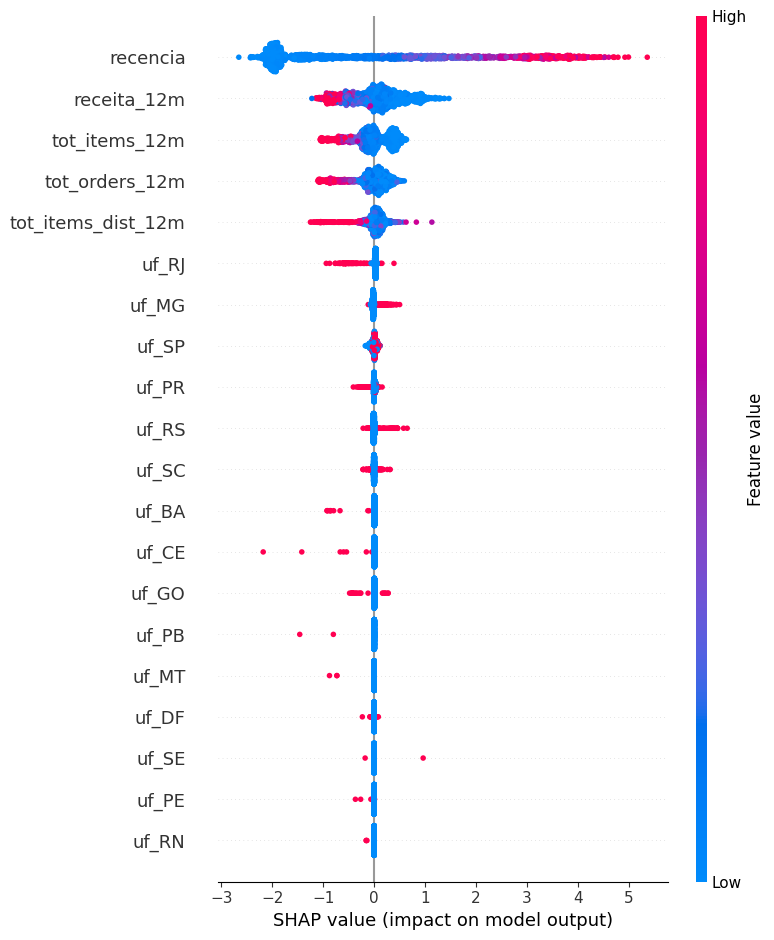

In [ ]:
shap.summary_plot(shap_values, X_oot_transformado)

### Esse gráfico traz a variável mais importante para o algoritmo tomar as decisões.
### A leitura é feita de cima para baixo (mais importante para a menos importante).

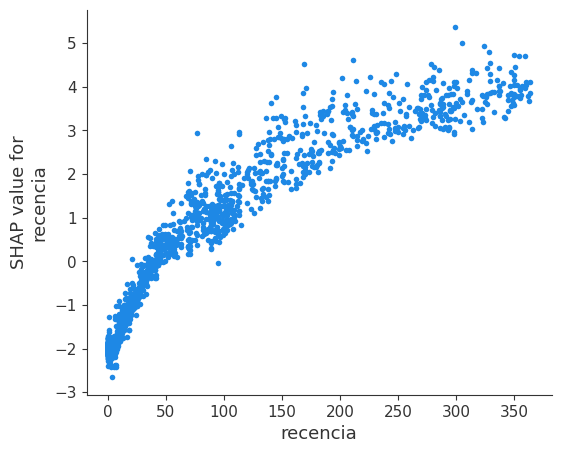

In [ ]:
# Plot do gráfico de dependência SHAP com linha horizontal no 0
shap.dependence_plot("recencia", shap_values, X_oot_transformado, interaction_index=None)
### Comece sempre com o interaction_index=None e posteriormente vá fazendo correlações com outras variáveis.

#### Traças uma linha vermelha horizontal no 0, onde para baixo será Não Churn e acima será Churn.
#### A partir daí, verifica-se que a partir de 40 a 50 dias, o cliente entra em Churn

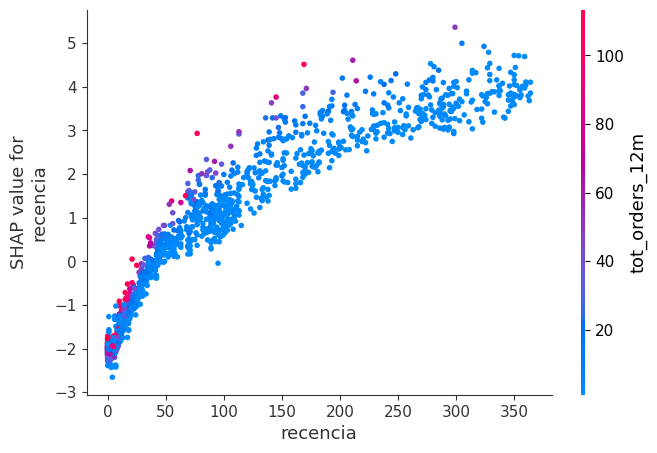

In [ ]:
# Plot do gráfico de dependência SHAP com linha horizontal no 0
shap.dependence_plot("recencia", shap_values, X_oot_transformado, interaction_index="tot_orders_12m")

### Buscando a correlação com outras features.

**TUNE**

Nada mais é do que mexer nas configurações do algoritmo para tentar achar o melhor parâmetro e melhorar o rendimento

Tente tunar **somente** quando não conseguir achar um bom resultado em nenhum algoritmo

In [ ]:
rf_pipe

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf'])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_pipe = Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars,arbitrary_number=-999)),
    ("categorig_imputer",CategoricalImputer(variables=cat_vars,fill_value="missing")),
    ("ohe", OneHotEncoder(variables=cat_vars)),
    ("rf",RandomForestClassifier(random_state=42))
    ])

In [ ]:
### Parecido com o Stratified K-Fold, vai tentar estressar o modelo para encontrar o melhor parâmetro para o seu modelo

parametros = {
    "rf__n_estimators":[120, 300, 500, 800, 1200],
    "rf__max_depth": [2, 3, 4, 5, 6, 7, None],
    "rf__min_samples_split": [1, 2, 5, 10, 15, 100]
}

In [ ]:
grid = GridSearchCV(rf_pipe,parametros,scoring="roc_auc",cv=5,n_jobs=-1)

In [ ]:
### Faz sempre no Treino
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
175 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('numeric_imputer',
                                        ArbitraryNumberImputer(arbitrary_number=-999,
                                                               variables=['tot_orders_12m',
                                                                          'tot_items_12m',
                                                                          'tot_items_dist_12m',
                                                                          'receita_12m',
                                                                          'recencia'])),
                                       ('categorig_imputer',
                                        CategoricalImputer(fill_value='missing',
                                                           variables=['uf'])),
                                       ('ohe', OneHotEncoder(variables=['uf'])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [2, 3, 4, 5, 6, 7, None],
                         'rf__min_samples_split': [1, 2, 5, 10, 15, 100],
                         'rf__n_estimators': [120, 300, 500, 800, 1200]},
             scoring='roc_auc')

In [ ]:
print(grid.best_estimator_)

Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf'])),
                ('rf',
                 RandomForestClassifier(n_estimators=1200, random_state=42))])


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.541429,0.117106,0.000000,0.000000,2,1,120,"{'rf__max_depth': 2, 'rf__min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
1,0.540460,0.050824,0.000000,0.000000,2,1,300,"{'rf__max_depth': 2, 'rf__min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
2,0.443145,0.057646,0.000000,0.000000,2,1,500,"{'rf__max_depth': 2, 'rf__min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
3,0.598458,0.170465,0.000000,0.000000,2,1,800,"{'rf__max_depth': 2, 'rf__min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
4,0.761663,0.055078,0.000000,0.000000,2,1,1200,"{'rf__max_depth': 2, 'rf__min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.661051,0.015166,0.065706,0.002443,None,100,120,"{'rf__max_depth': None, 'rf__min_samples_split...",0.911378,0.889660,0.907265,0.915479,0.909036,0.906564,0.008888,34
206,1.559534,0.012949,0.090571,0.002131,None,100,300,"{'rf__max_depth': None, 'rf__min_samples_split...",0.910806,0.890632,0.906796,0.916208,0.908246,0.906538,0.008576,35
207,3.765057,0.815003,0.188923,0.049605,None,100,500,"{'rf__max_depth': None, 'rf__min_samples_split...",0.911534,0.890944,0.906996,0.916494,0.908446,0.906883,0.008609,33
208,4.331050,0.351629,0.188480,0.049373,None,100,800,"{'rf__max_depth': None, 'rf__min_samples_split...",0.911595,0.891264,0.906484,0.917015,0.908481,0.906968,0.008620,31


In [ ]:
best_estimator = grid.best_estimator_

In [ ]:
classificacao = best_estimator.predict(X_oot)
proba = best_estimator.predict_proba(X_oot)[:,1]

In [ ]:
proba

array([0.75      , 0.0225    , 0.11083333, ..., 0.06583333, 0.13416667,
       0.19916667])

In [ ]:
roc_auc_score(y_oot, proba)

0.9246234571094162

In [ ]:
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['tot_orders_12m',
                                                   'tot_items_12m',
                                                   'tot_items_dist_12m',
                                                   'receita_12m',
                                                   'recencia'])),
                ('categorig_imputer',
                 CategoricalImputer(fill_value='missing', variables=['uf'])),
                ('ohe', OneHotEncoder(variables=['uf'])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
proba_original= rf_pipe.predict_proba(X_oot)[:,1]
roc_auc_score(y_oot,proba_original)

0.9229213304736